In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns

We have already cleaned our csv files. Now import it combined_df for futher analysis

In [2]:
# Define the folder path where your cleaned CSV files are stored
folder_path = r'E:\EDA\ICC Cricket World Cup\cleanedFiles'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty dictionary to store DataFrames by file names
data_frames = {}

# Read each CSV file and store DataFrames by file names in the dictionary
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_frames[file] = df

# Combine DataFrames in the dictionary into a single DataFrame
combined_df = pd.concat(data_frames.values(), axis=1)




In [3]:
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the combined DataFrame
combined_df.head()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchStatus_text,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,description,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,Year,Winner,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,totalRuns,id,fullName,shortName,nationality,rightArmedBowl,rightHandedBat,bowlingStyle,teamId,id,fullName,shortName,abbreviation,wicketKeeperId,captainId,id,fullName,city,country
0,1.0,3124.0,1.0,4.82,50.0,241.0,9.0,0.0,0.0,0.0,False,3.0,6.0,0.0,2.0,0.0,2859.0,73.0,"Australia, who chose to bat",Australia,2808.0,2809.0,1975-06-07 11:00:00+00:00,Australia won by 73 runs,73.0,0.0,Match 1,ODI,Prudential World Cup 1975,60.0,360.0,True,1975.0,Australia,1,1,1,1,5591,1220,False,84666,1.0,1,0,0,0,1Wd,0,1,1.0,1.0,3.0,2065.0,Rick McCosker,RB McCosker,Australian,False,True,MEDIUM_SEAM,2808.0,11.0,England,England,ENG,2050.0,1988.0,1.0,M. A. Chidambaram Stadium,Chennai,India
1,2.0,3124.0,2.0,3.95,47.2,187.0,10.0,0.0,0.0,0.0,True,0.0,2.0,0.0,2.0,0.0,2860.0,40.0,"New Zealand, who chose to bat",New Zealand,2810.0,2811.0,1975-06-07 11:00:00+00:00,New Zealand won by 181 runs,181.0,0.0,Match 2,ODI,Prudential World Cup 1975,60.0,360.0,True,1975.0,New,2,2,2,0,5591,1601,False,84666,2.0,1,0,0,0,1,1,0,2.0,1.0,3.0,2114.0,Alan Turner,A Turner,Australian,False,True,MEDIUM_SEAM,2808.0,11.0,England,England,ENG,1996.0,2004.0,2.0,Eden Gardens,Kolkata,India
2,3.0,3125.0,1.0,6.68,50.0,334.0,6.0,0.0,0.0,0.0,False,1.0,5.0,1.0,2.0,0.0,2861.0,71.0,"England, who chose to bat",England,2812.0,2813.0,1975-06-07 11:00:00+00:00,England won by 202 runs,202.0,0.0,Match 3,ODI,Prudential World Cup 1975,60.0,360.0,True,1975.0,England,3,3,3,0,5591,1601,False,84666,3.0,1,W,1,0,1Nb,0,0,3.0,1.0,3.0,2083.0,Greg Chappell,G Chappell,Australian,True,True,MEDIUM_SEAM,2808.0,11.0,England,England,ENG,2229.0,2096.0,3.0,Sawai Mansingh Stadium,Jaipur,India
3,4.0,3125.0,2.0,3.26,40.1,131.0,9.0,0.0,0.0,0.0,True,1.0,6.0,0.0,9.0,0.0,2862.0,39.0,"West Indies, who chose to field",West Indies,2814.0,2815.0,1975-06-07 11:00:00+00:00,West Indies won by 9 wickets,0.0,9.0,Match 4,ODI,Prudential World Cup 1975,60.0,360.0,True,1975.0,West,4,4,4,1Wd,5591,1601,False,84666,4.0,4,1Nb,0,0,0,4,0,4.0,1.0,9.0,2115.0,Jeff Thomson,J Thomson,Australian,True,True,FAST_SEAM,2808.0,11.0,England,England,ENG,2222.0,2226.0,4.0,Wankhede Stadium,Mumbai,India
4,5.0,3126.0,1.0,3.98,50.0,199.0,10.0,0.0,0.0,0.0,True,6.0,3.0,0.0,5.0,0.0,2863.0,82.0,"Sri Lanka, who chose to field",Sri Lanka,2816.0,2817.0,1975-06-11 11:00:00+00:00,Australia won by 52 runs,52.0,0.0,Match 5,ODI,Prudential World Cup 1975,60.0,360.0,True,1975.0,Australia,5,4,5,0,5591,1601,False,84666,5.0,0,0,4,0,0,0,0,5.0,1.0,4.0,2020.0,Ian Chappell,I Chappell,Australian,True,True,LEG_SPIN,2808.0,11.0,England,England,ENG,2330.0,2169.0,5.0,M. Chinnaswamy Stadium,Bengaluru,India


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157323 entries, 0 to 157322
Data columns (total 71 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                2682 non-null    float64
 1   matchId                           2682 non-null    float64
 2   inningsNumber                     2682 non-null    float64
 3   runRate                           2682 non-null    float64
 4   overProgress                      2682 non-null    float64
 5   runs                              2682 non-null    float64
 6   wkts                              2682 non-null    float64
 7   ballsFaced                        2682 non-null    float64
 8   fours                             2682 non-null    float64
 9   sixes                             2682 non-null    float64
 10  allOut                            2682 non-null    object 
 11  noBallRuns                        2682 non-null    f

# Exploratory Data Analysis (EDA)

1. How many matches were played in each year?

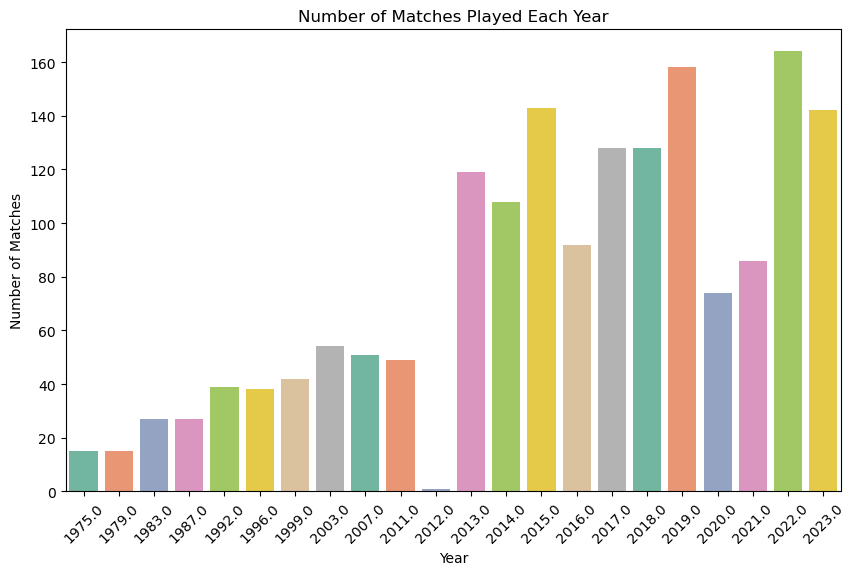

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Year', palette='Set2')
plt.title('Number of Matches Played Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

2: How does the total number of runs vary across different venues?

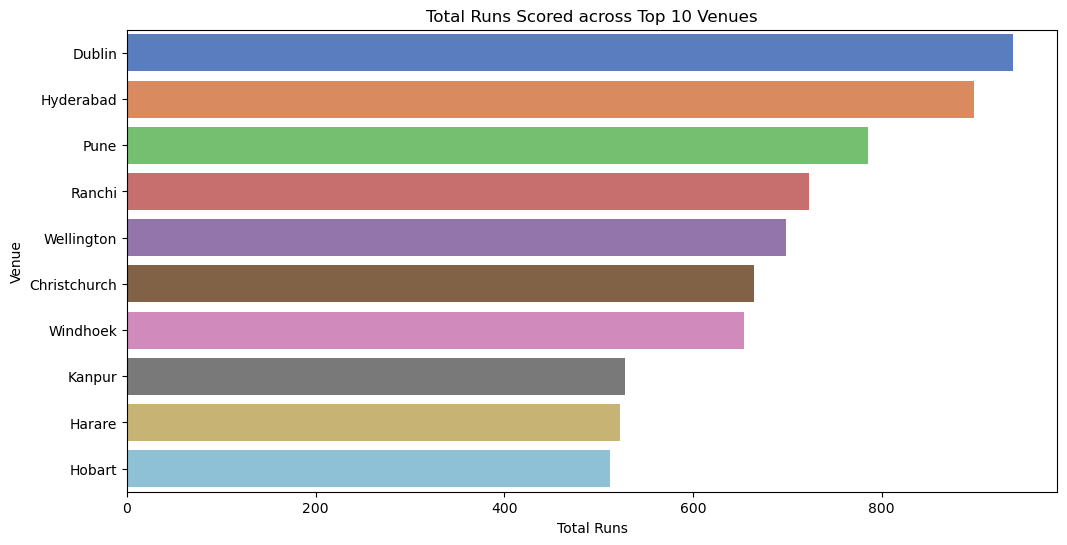

In [6]:
venue_runs = combined_df.groupby('city')['runs'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='runs', y='city', data=venue_runs[:10], palette='muted')
plt.title('Total Runs Scored across Top 10 Venues')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()

####  Which venues have seen the highest and lowest average run rates?

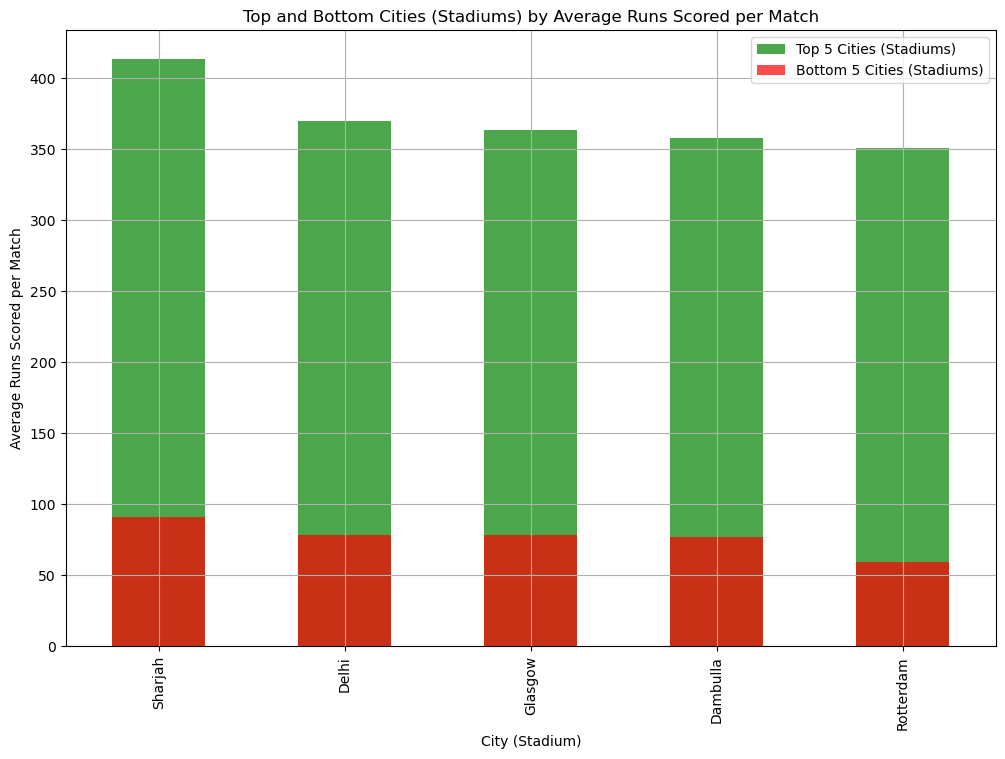

In [7]:
# Calculating average runs scored per match for each city (stadium)
city_avg_runs = combined_df.groupby('city')['runs'].mean().sort_values(ascending=False)
top_cities = city_avg_runs.head(5)
bottom_cities = city_avg_runs.tail(5)

plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar', color='green', alpha=0.7, label='Top 5 Cities (Stadiums)')
bottom_cities.plot(kind='bar', color='red', alpha=0.7, label='Bottom 5 Cities (Stadiums)')
plt.xlabel('City (Stadium)')
plt.ylabel('Average Runs Scored per Match')
plt.title('Top and Bottom Cities (Stadiums) by Average Runs Scored per Match')
plt.legend()
plt.grid(True)
plt.show()

3.What is the distribution of match outcomes by victory margin

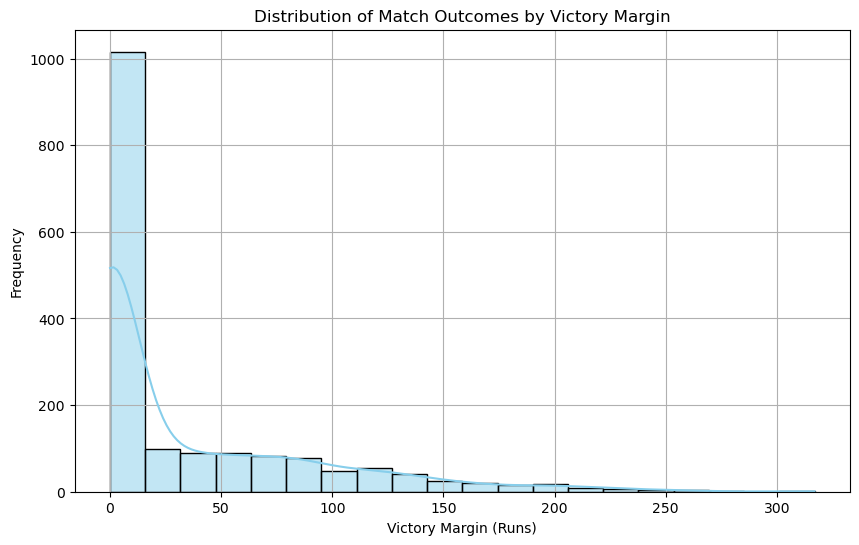

In [8]:
victory_margin_data = combined_df['matchStatus_victoryMarginRuns'].dropna()

# Create a histogram to visualize the distribution of victory margins
plt.figure(figsize=(10, 6))
sns.histplot(victory_margin_data, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Match Outcomes by Victory Margin')
plt.xlabel('Victory Margin (Runs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 4. top 10 teams with winning percentage in the tournament?

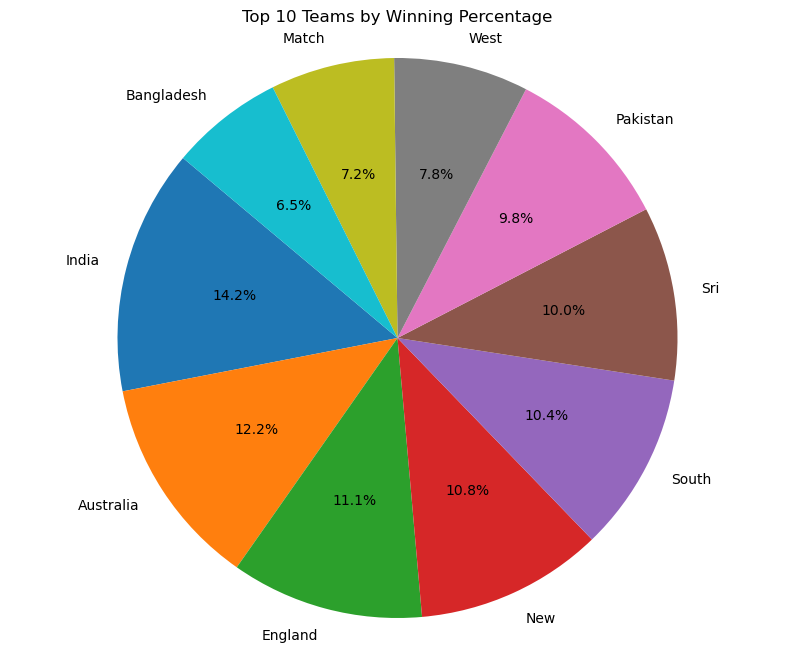

In [9]:
# Calculate winning percentage for each team
team_wins = combined_df[combined_df['Winner'].notnull()]
win_percentage = team_wins['Winner'].value_counts(normalize=True) * 100

# Select top 10 teams by winning percentage
top_10_teams = win_percentage.head(10)

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(top_10_teams, labels=top_10_teams.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Teams by Winning Percentage')
plt.axis('equal')
plt.show()

### Which team has won the most matches?

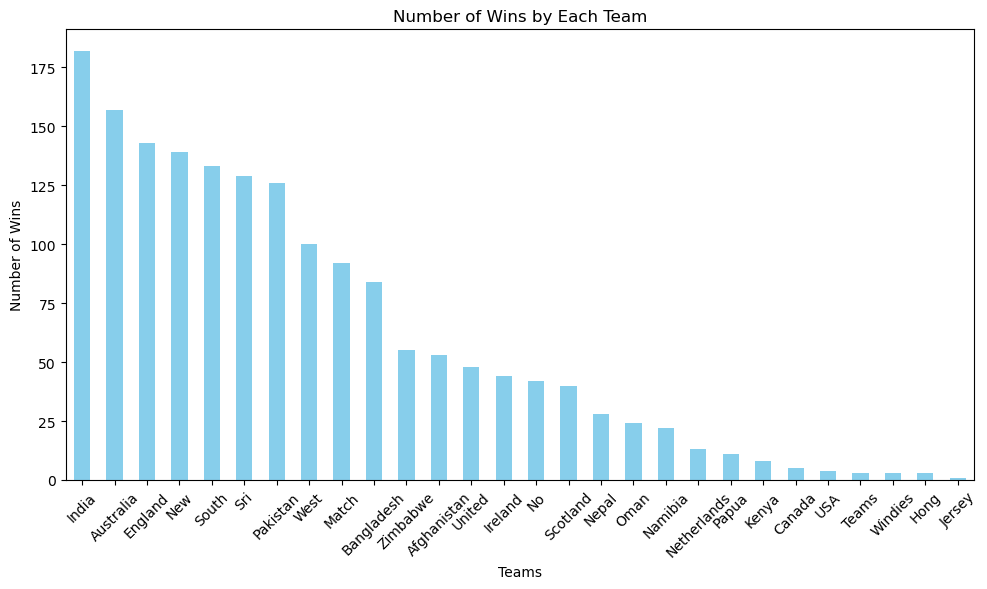

In [12]:
win_counts = combined_df['Winner'].value_counts()

# Visualizing the number of wins by each team
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

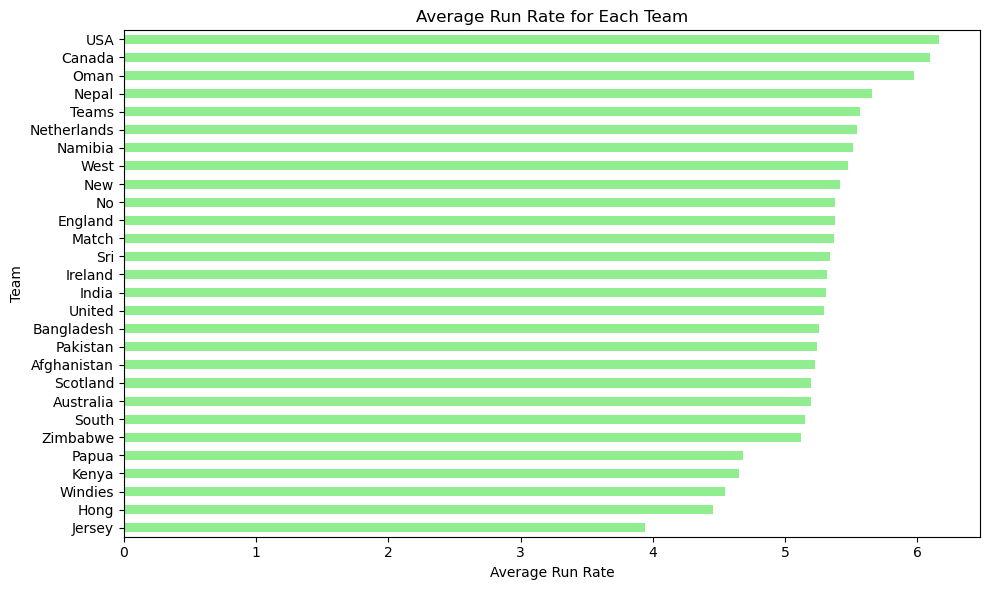

In [13]:
# Calculating the average run rate for each team
average_run_rate_per_team = combined_df.groupby('Winner')['runRate'].mean().sort_values()

# Visualizing the average run rate for each team
plt.figure(figsize=(10, 6))
average_run_rate_per_team.plot(kind='barh', color='lightgreen')
plt.title('Average Run Rate for Each Team')
plt.xlabel('Average Run Rate')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

#### number of matches won by each team based on toss.elected

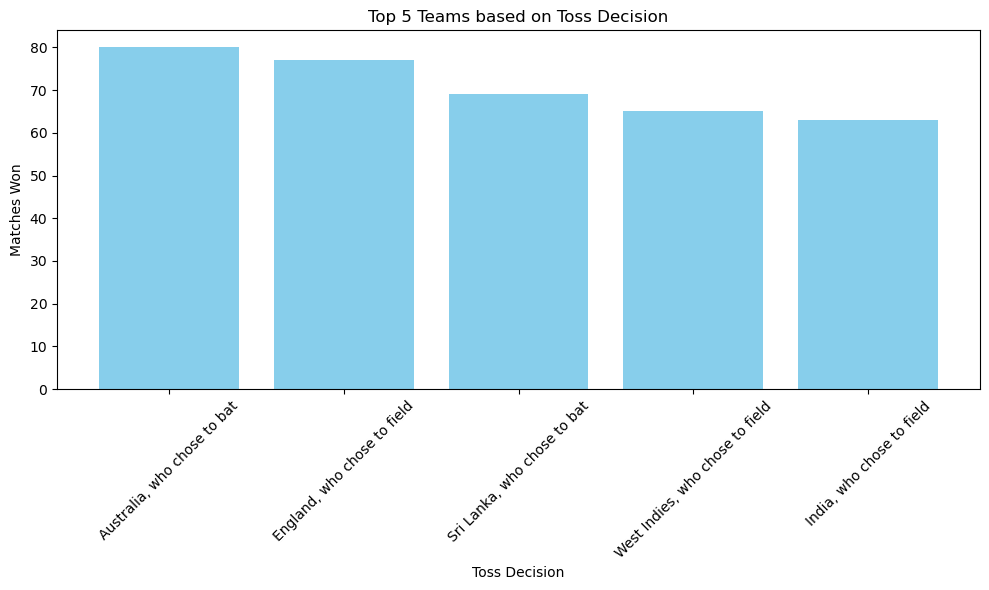

In [14]:
# Counting the number of matches won by each team based on toss.elected
matches_won_by_toss_elected = combined_df.groupby('toss.elected')['matchId'].count().reset_index()
matches_won_by_toss_elected.columns = ['Toss Decision', 'Matches Won']

# Selecting top 5 teams based on toss.elected
top_5_teams_by_toss_elected = matches_won_by_toss_elected.nlargest(5, 'Matches Won')

# Visualizing top 5 teams based on toss.elected
plt.figure(figsize=(10, 6))
plt.bar(top_5_teams_by_toss_elected['Toss Decision'], top_5_teams_by_toss_elected['Matches Won'], color='skyblue')
plt.xlabel('Toss Decision')
plt.ylabel('Matches Won')
plt.title('Top 5 Teams based on Toss Decision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### top 5 team that won the most matches by a margin of more than 50 runs or by more than 5 wickets 

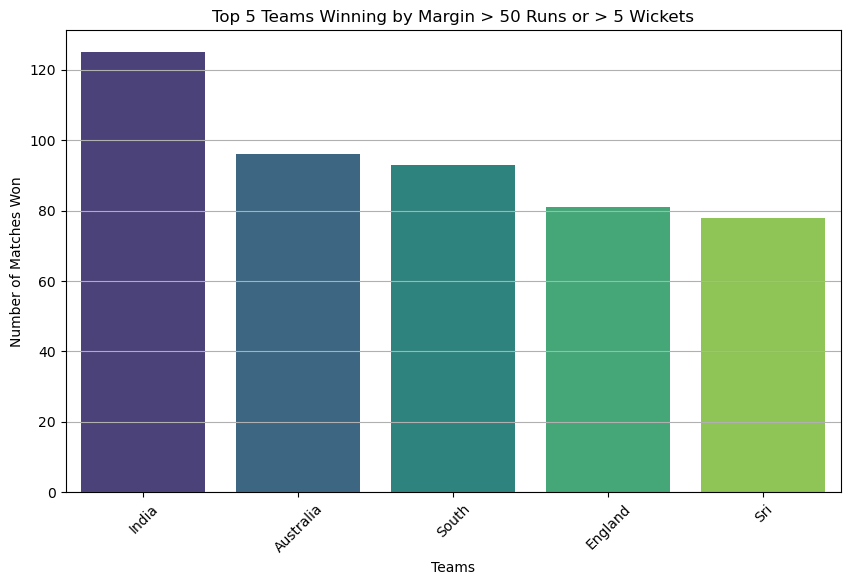

In [15]:
# Filter matches won by a margin of more than 50 runs or by more than 5 wickets
margin_condition = (combined_df['matchStatus_victoryMarginRuns'] > 50) | (combined_df['matchStatus_victoryMarginWickets'] > 5)
matches_won_by_margin = combined_df[margin_condition]

# Count matches won by each team
team_wins = matches_won_by_margin['Winner'].value_counts().head(5)

# Visualize the top 5 teams using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.title('Top 5 Teams Winning by Margin > 50 Runs or > 5 Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y')

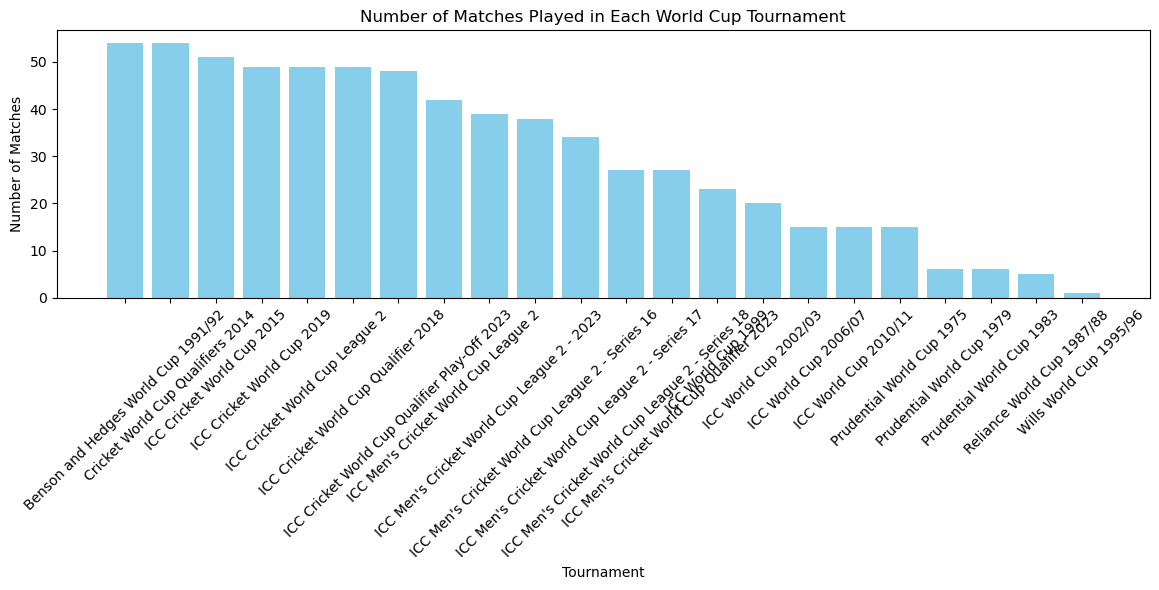

In [35]:
# Drop rows with NaN values in the 'tournamentLabel' column
combined_df = combined_df.dropna(subset=['tournamentLabel'])

# Filter data for tournament labels containing 'World Cup'
world_cup_tournaments = combined_df[combined_df['tournamentLabel'].str.contains('World Cup')]

# Group data by 'tournamentLabel' and count matches for each tournament
tournament_match_count = world_cup_tournaments.groupby('tournamentLabel')['matchId'].count().reset_index()
tournament_match_count = tournament_match_count.rename(columns={'matchId': 'Match Count'})

# Sort the tournaments by match count in descending order for better visualization
tournament_match_count = tournament_match_count.sort_values(by='Match Count', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tournament_match_count['tournamentLabel'], tournament_match_count['Match Count'], color='skyblue')
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each World Cup Tournament')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Limit number of ticks on x-axis for better visibility
plt.xticks(ticks=tournament_match_count.index, labels=tournament_match_count['tournamentLabel'].tolist())

plt.show()